<a href="https://colab.research.google.com/github/Shaeeraaa/NNDL/blob/main/recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8632 - loss: 0.4735 - val_accuracy: 0.9662 - val_loss: 0.1245
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9627 - loss: 0.1230 - val_accuracy: 0.9727 - val_loss: 0.0920
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9766 - loss: 0.0779 - val_accuracy: 0.9755 - val_loss: 0.0858
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0605 - val_accuracy: 0.9725 - val_loss: 0.1017
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1246


Model Test Accuracy: 0.9693999886512756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


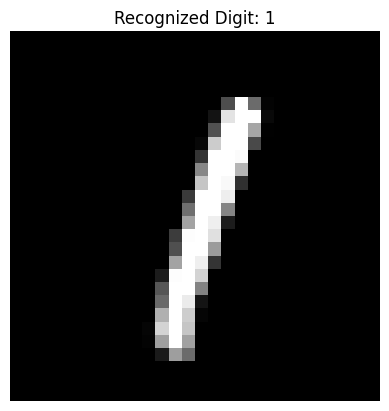

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=4, batch_size=32, validation_split=0.1)

# Test the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Model Test Accuracy:", accuracy)

# Save trained model
model.save("mnist_digit_model_custom.h5")

# Predict a sample image
sample_index = 5
prediction = model.predict(x_test[sample_index:sample_index+1])
predicted_digit = np.argmax(prediction)

# Display result
plt.imshow(x_test[sample_index], cmap='gray')
plt.title("Recognized Digit: " + str(predicted_digit))
plt.axis('off')
plt.show()
